Random Forest Method

Applying Cross-Validation to Random Forest Classifier
Exercise: Implement a random forest classifier and evaluate the model using k-fold cross-validation. Analyze the cross-validation scores to assess model stability.



In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('adult.csv')
print(df.head())

labelencoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = labelencoder.fit_transform(df[column])

X = df.drop('income', axis=1)  
y = df['income']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfClassifier = RandomForestClassifier(n_estimators=100, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cvScores = cross_val_score(rfClassifier, X_train, y_train, cv=kf)

print("Cross Validation Scores:", cvScores)
print("Mean Cross Validation Score:", np.mean(cvScores))
print("Standard Deviation of Cross Validation Scores:", np.std(cvScores))

rfClassifier.fit(X_train, y_train)

y_pred = rfClassifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)


   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

Evaluating Precision, Recall, and F1-Score for Random Forests
Exercise: Implement a random forest classifier and calculate precision, recall, and F1-score. Discuss the trade-offs between these metrics and their importance for classification tasks.



In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('adult.csv')

le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

X = data.drop('income', axis=1)  
y = data['income'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfCassifier = RandomForestClassifier(n_estimators=100, random_state=42)
rfClassifier.fit(X_train, y_train)

y_pred = rfClassifier.predict(X_test)

precisionScore = precision_score(y_test, y_pred)
print(f"Precision Score: {precisionScore:.2f}")

recallScore = recall_score(y_test, y_pred)
print(f"Recall Score: {recallScore:.2f}")

f1Score = f1_score(y_test, y_pred)
print(f"F1 Score: {f1Score:.2f}")



Precision Score: 0.74
Recall Score: 0.64
F1 Score: 0.69


Precision: This metric tells you the proportion of true positive predictions relative to the total positive predictions (true positives + false positives). High precision indicates that when the model predicts the positive class, it is likely correct. Precision is crucial when the cost of false positives is high (e.g., in spam detection, where incorrectly labeling a legitimate email as spam could have significant consequences).

Recall: Also known as sensitivity, this metric measures the proportion of true positives relative to the total actual positives (true positives + false negatives). High recall indicates that the model can identify most of the positive instances. Recall is important in situations where false negatives are costly (e.g., in disease screening, where failing to identify a patient with a disease could be dangerous).

F1-Score: This is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall, making it useful for assessing model performance, especially in imbalanced datasets. A high F1-score indicates a good balance between precision and recall.

Trade-offs:
In many cases, there is a trade-off between precision and recall. For example, if you increase the threshold for predicting a positive class, you might get fewer false positives (higher precision) but more false negatives (lower recall). It’s essential to choose the right balance based on the specific context of the classification task.


Investigating Overfitting and Underfitting in Gradient Boosting Machines
Exercise: Train a gradient boosting classifier with varying numbers of estimators and learning rates. Evaluate the model for overfitting and underfitting by comparing training and validation performance.



    n_estimators  learning_rate  train_accuracy  val_accuracy
0             50          0.001        0.759501      0.765585
1             50          0.010        0.803598      0.810830
2             50          0.100        0.861004      0.865902
3             50          0.500        0.878074      0.879312
4            100          0.001        0.759501      0.765585
5            100          0.010        0.844291      0.851059
6            100          0.100        0.868016      0.873989
7            100          0.500        0.884166      0.880950
8            150          0.001        0.759501      0.765585
9            150          0.010        0.846825      0.853516
10           150          0.100        0.871753      0.877162
11           150          0.500        0.889975      0.880029
12           200          0.001        0.759501      0.765585
13           200          0.010        0.849922      0.854745
14           200          0.100        0.874747      0.876958
15      

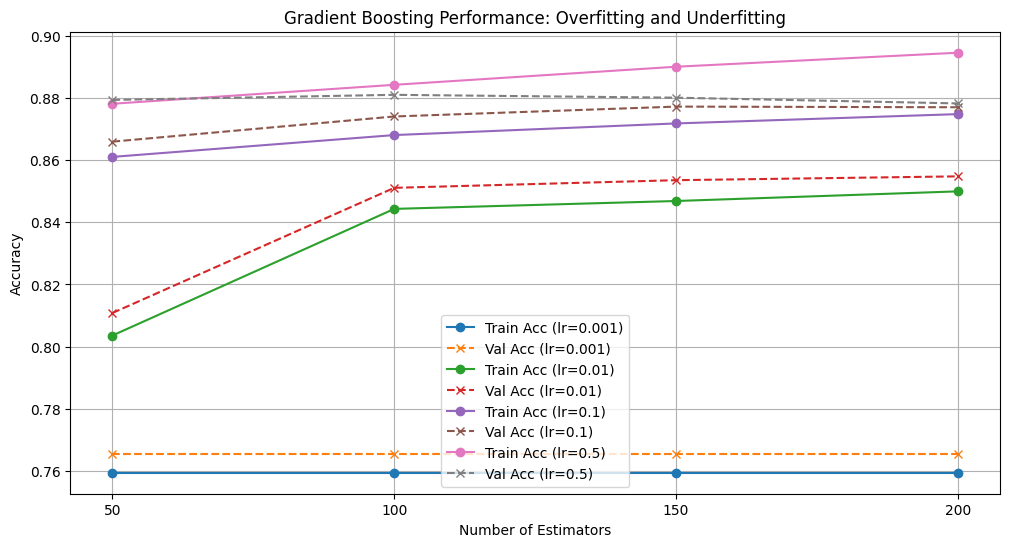

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('adult.csv')

data = pd.get_dummies(data, drop_first=True)  

X = data.drop('income_>50K', axis=1) 
y = data['income_>50K'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nEstimators = [50, 100, 150, 200]
learningRates = [0.001, 0.01, 0.1, 0.5]

results = []

for n in nEstimators:
    for lr in learningRates:
        model = GradientBoostingClassifier(n_estimators=n, learning_rate=lr, random_state=42)
        model.fit(X_train, y_train)
        train_preds = model.predict(X_train)
        val_preds = model.predict(X_test)
        
        train_accuracy = accuracy_score(y_train, train_preds)
        val_accuracy = accuracy_score(y_test, val_preds)
        
        results.append((n, lr, train_accuracy, val_accuracy))
        
results = pd.DataFrame(results, columns=['n_estimators', 'learning_rate', 'train_accuracy', 'val_accuracy'])

print(results)

plt.figure(figsize=(12, 6))

for lr in learningRates:
    subset = results[results['learning_rate'] == lr]
    plt.plot(subset['n_estimators'], subset['train_accuracy'], marker='o', label=f'Train Acc (lr={lr})')
    plt.plot(subset['n_estimators'], subset['val_accuracy'], marker='x', linestyle='--', label=f'Val Acc (lr={lr})')

plt.title("Gradient Boosting Performance: Overfitting and Underfitting:")
plt.xlabel("Number of Estimators= ")
plt.ylabel("Accuracy= ")
plt.xticks(nEstimators)
plt.legend()
plt.grid()
plt.show()


ROC Curve and AUC for Gradient Boosting Classifier
Exercise: Implement a gradient boosting classifier and plot the ROC curve. Compute the AUC and interpret how well the model distinguishes between classes.



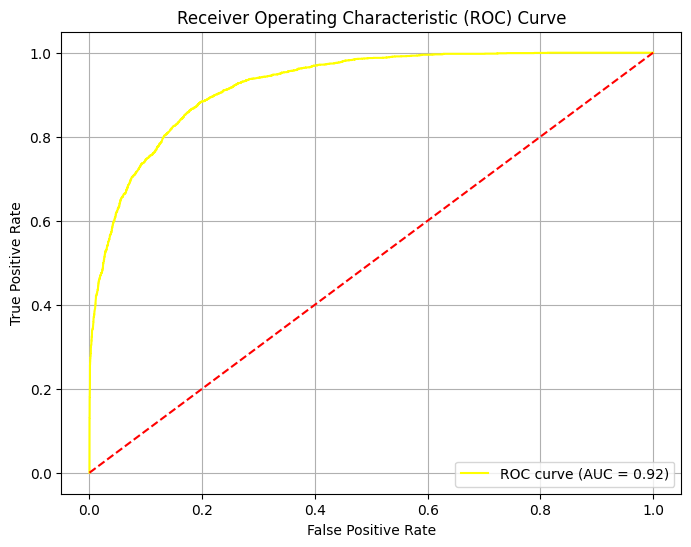

AUC: 0.92
The model has good discrimination ability.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('adult.csv')

data = pd.get_dummies(data, drop_first=True)  

X = data.drop('income_>50K', axis=1)  
y = data['income_>50K']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

yScore = model.predict_proba(X_test)[:, 1]  

falsePosRate, truePosRate, thresholds = roc_curve(y_test, yScore)
rocAuc = auc(falsePosRate, truePosRate)

plt.figure(figsize=(8, 6))
plt.plot(falsePosRate, truePosRate, color='yellow', label='ROC curve (AUC = {:.2f})'.format(rocAuc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc='lower right')
plt.grid()
plt.show()

print("AUC: {:.2f}".format(rocAuc))
if rocAuc < 0.5:
    print("The model performs worse than random guessing.")
elif rocAuc == 0.5:
    print("The model has no discrimination ability.")
else:
    print("The model has good discrimination ability.")


Model Performance Comparison with Different Metrics
Exercise: Compare the performance of different classifiers (e.g., SVM, random forest, gradient boosting) using cross-validation. Evaluate and compare the models based on accuracy, precision, recall, F1-score, and ROC-AUC.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

data = pd.read_csv('adult.csv')
data = pd.get_dummies(data, drop_first=True)  

X = data.drop('income_>50K', axis=1)  
y = data['income_>50K']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

results = {}

for name, clf in classifiers.items():
    cvAccuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    cvPrecision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision')
    cvRecall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall')
    cvF1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
    cvRocAuc = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
    
    results[name] = {
        "Accuracy": cvAccuracy.mean(),
        "Precision": cvPrecision.mean(),
        "Recall": cvRecall.mean(),
        "F1 Score": cvF1.mean(),
        "ROC AUC": cvRocAuc.mean()
    }

result = pd.DataFrame(results).T
print(result)

result.plot(kind='bar', figsize=(10, 6))
plt.title("Classifier Performance Comparison")
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid()
plt.show()
